Question 3

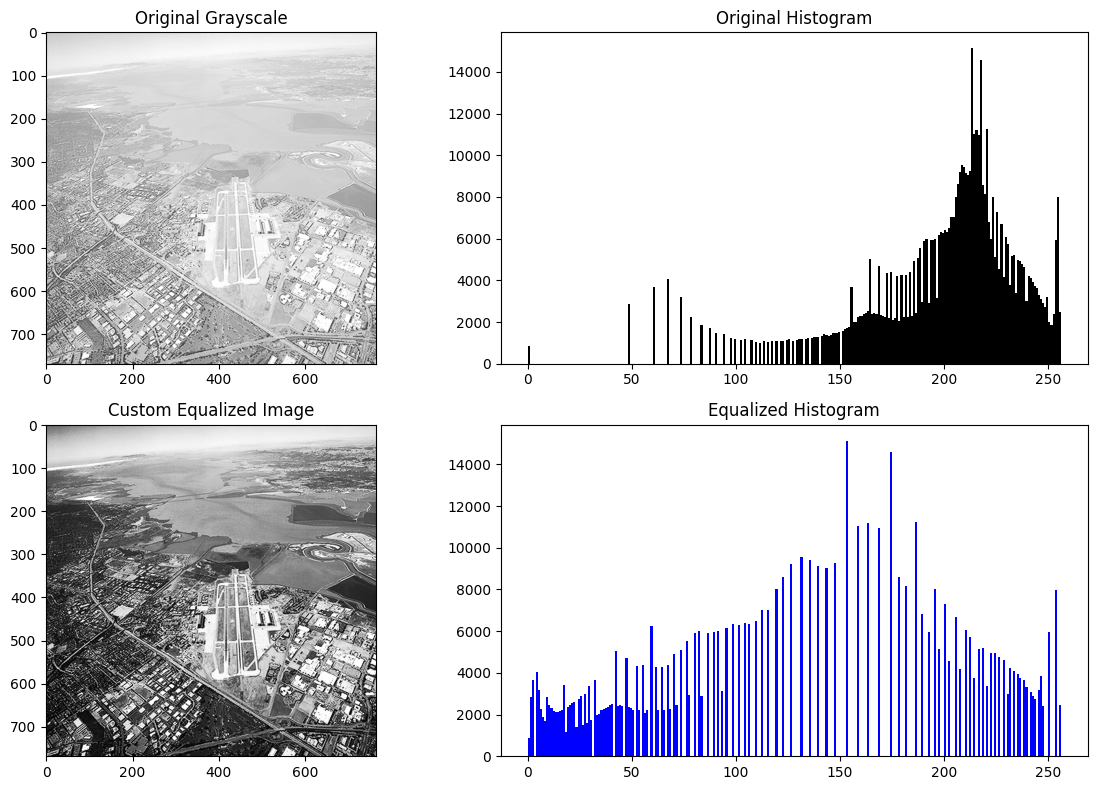

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def custom_histogram_equalization(image_path):
   
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    #grayscale image
    
    height, width = img.shape
    num_pixels = height * width

    
    hist = np.zeros(256)
    for i in range(height):
        for j in range(width):
            hist[img[i, j]] += 1

    
    cdf = hist.cumsum()
    
    
    cdf_min = cdf[cdf > 0].min()
    cdf_normalized = (cdf - cdf_min) * 255 / (num_pixels - cdf_min)
    cdf_normalized = cdf_normalized.astype('uint8')

    
    img_equalized = cdf_normalized[img]

    
    plt.figure(figsize=(12, 8))

    # Original
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Grayscale")
    
    plt.subplot(2, 2, 2)
    plt.hist(img.ravel(), 256, [0, 256], color='black')
    plt.title("Original Histogram")

    # Equalized
    plt.subplot(2, 2, 3)
    plt.imshow(img_equalized, cmap='gray')
    plt.title("Custom Equalized Image")

    plt.subplot(2, 2, 4)
    plt.hist(img_equalized.ravel(), 256, [0, 256], color='blue')
    plt.title("Equalized Histogram")

    plt.tight_layout()
    plt.show()

    return img_equalized


equalizedhistrogram = custom_histogram_equalization('runway.png')